# Problem Set 1
## Protostars and Planets (AST 7939)

Alyssa Bulatek \
January 24, 2022

### 5. Numerical Integration

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

plt.rc('text', usetex = True) # Use LaTeX font in plots
plt.rc('font', family = 'serif')
plt.rcParams['text.latex.preamble'] = r'\usepackage{gensymb}'
plt.rcParams.update({'font.size': 12})
display_dpi = 150

In [2]:
def derivatives(xi, psi):
    return [psi[1], ((-2 * psi[1])/xi) + np.exp(-psi[0])]

xi0 = 1e-4
psi0 = [xi0**2/6, xi0/3]
xi5 = np.linspace(xi0, 8, 50)

sol5 = solve_ivp(derivatives, t_span = [xi0, 8], y0 = [0, 0], t_eval = xi5)
psi5, psi_prime5 = sol5['y'][0], sol5['y'][1]

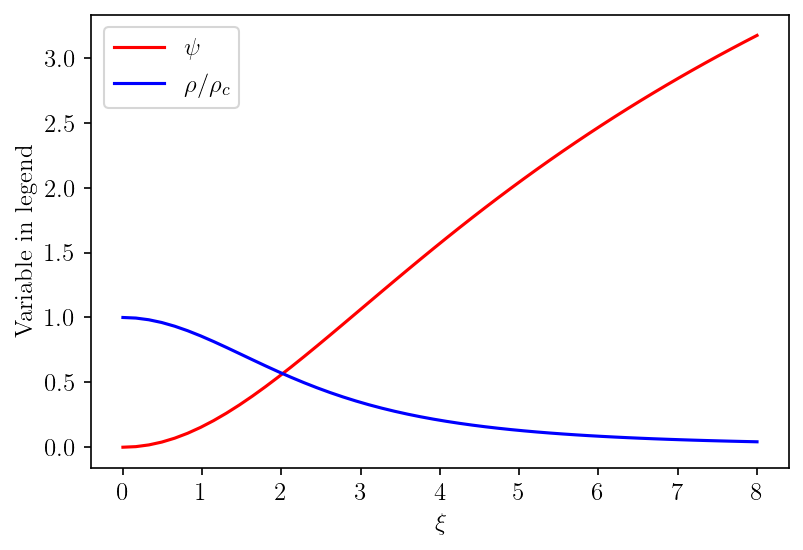

In [3]:
fig = plt.figure(dpi = display_dpi)
plt.plot(xi5, psi5, label = r'$\psi$', color = 'r')
plt.plot(xi5, np.exp(-psi5), label = r'$\rho/\rho_c$', color = 'b')
plt.legend(loc = 'upper left')
plt.xlabel(r'$\xi$')
plt.ylabel('Variable in legend')
plt.savefig("part5.pdf", dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

### 7. Dimensionless Mass and Density Contrast

In [5]:
# Need a larger set of xi values
xi7 = np.linspace(xi0, 1e3, 500000)
sol7 = solve_ivp(derivatives, t_span = [xi0, 1e3], y0 = [0, 0], t_eval = xi7)
psi7, psi_prime7 = sol7['y'][0], sol7['y'][1]

contrast = np.exp(psi7) # Typo in part 6 of handout, but I think this version is correct
m = (xi7**2 * np.exp(-psi7/2) * psi_prime7)/np.sqrt(4.*np.pi)

In [6]:
print("The maximum value of m is", m[np.argmax(m)])
print("The density contrast at the maximum value of m is", contrast[np.argmax(m)])

The maximum value of m is 1.1823572149781791
The density contrast at the maximum value of m is 13.98364855994107


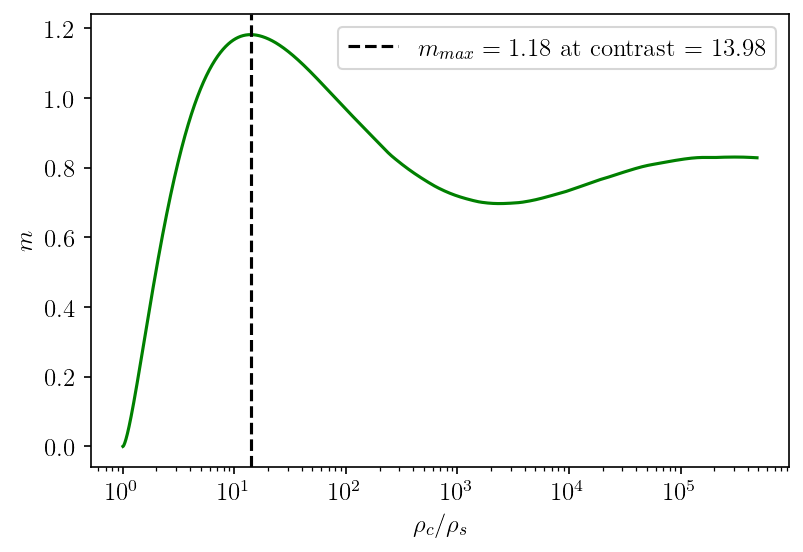

In [7]:
fig = plt.figure(dpi = display_dpi)
plt.plot(contrast, m, color = 'g')
plt.axvline(contrast[np.argmax(m)], linestyle = '--', color = 'k', 
            label = '$m_{max} = 1.18$ at contrast = 13.98')
plt.xscale('log')
plt.xlabel(r'$\rho_c/\rho_s$')
plt.ylabel('$m$')
plt.legend()
plt.savefig("part7.pdf", dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

### 11. Enclosed Mass and Average Enclosed Density

In [8]:
from astropy import units as u
from astropy import constants

For the local case:

In [15]:
c_s = 1.894e4 * (u.cm/u.s)
P_s = 4.143e-11 * (u.g*(u.cm**(-1))*(u.s**(-2)))
r_0 = (c_s**2/np.sqrt(55.92*np.pi*constants.G*P_s)).decompose().cgs
leading_coeff = ((c_s)**4)/np.sqrt(4*np.pi*constants.G**3*P_s).decompose().cgs

M_enc = leading_coeff * np.exp(-psi7/2) * xi7**2 * r_0**2 * psi_prime7

In [16]:
M_enc

<Quantity [0.00000000e+00, 2.67439254e+56, 1.99047215e+57, ...,
           2.54563599e+65, 2.54563591e+65, 2.54563582e+65] cm2 g>